# ch01.03 DNN기초-회귀 모델

---
* 날짜: 2022.06.28
* 이름: 윤태우

## 학습내용
    - 딥러닝을 이용한 회귀 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 15장
* 데이터
  * 보스턴 집값 (boston houosing)
  * 캘리포티아 집값 (california housing) 

```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 288 (delta 75), reused 43 (delta 43), pack-reused 178
Receiving objects: 100% (288/288), 21.99 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (110/110), done.


## 보스턴 집값 (boston houosing) 예측하기
---

> 1978년 집값에 가장 큰 영향을 미치는 것이 '깨끗한 공기' 라는 연구 결과가 하버드 대학교 도시개발학과에서 발표되었습니다. 이들은 자신의 주장을 뒷받침하기 위해 집값의 변동에 영향을 미치는 여러가지 요인을 모아서 환경과 집값의 변동을 보여주는 데이터셋을 만들었습니다. [ 모두의 딥러닝 중]


```
- 0 CRIM: 인구 1인당 범죄 발생 수
- 1 ZN: 25,000평방 피트 이상의 주거 구역 비중
- 2 INDUS: 소매업 외 상업이 차지하는 면적 비율
- 3 CHAS: 찰스강 위치 변수(1:강 주변, 0: 이외)
- 4 NOX: 일산화질소 농도
- 5 RM: 집의 평균 방 수
- 6 AGE: 1940년 이전에 지어진 비율
- 7 DIS: 5가지 보스턴 시 고용 시설까지의 거리
- 8 RAD: 순환고속도로의 접근 용이성
- 9 TAX: 10,000달러당 부동산 세율 총계
- 10 PTRATIO: 지역별 학생과 교사 비율
- 11 B: 지역별 흑인비율
- 12 LSTAT: 급여가 낮은 직업에 종사하는 인구 비율
- 13 가격 (단위 $1,000)
```

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-02.PNG?raw=true
 width=450>
</p>

### | 데이터 준비

#### **데이터 로드**
* `housing.csv`

In [ ]:
df = pd.read_csv('/content/SkillTreePython-DeepLearning/dataset/housing.csv',
                 header=None, # 첫번째 행이 컬럼으로 안나오게(컬럼 X)
                delim_whitespace = True ) # 스페이스바 기준으로 데이터가 나뉨
print(df.shape) # 피쳐 수 14개(인풋 13, 타겟 1), 샘플 수 506개
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### **데이터 전처리**

In [ ]:
def load_data(path) :
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  # 데이터 적절히 불러오기
  df = pd.read_csv(path,
                 header=None, # 첫번째 행이 컬럼으로 안나오게(컬럼 X)
                delim_whitespace = True ) # 스페이스바 기준으로 데이터가 나뉨
  # 정규화 (x의 모든 속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df) # 원래는 train셋을 정규화 하고 valid 셋에 적용을 해야함.
  # x-y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)
  # train-test 데이터 분할
  X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2, random_state=1)
  print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)
  return X_train,X_valid, y_train, y_valid

In [ ]:
X_train, X_valid, y_train, y_valid = load_data('/content/SkillTreePython-DeepLearning/dataset/housing.csv')

(404, 13) (102, 13) (404,) (102,)


* 예측값 분포 확인

Text(0.5, 1.0, 'validset')

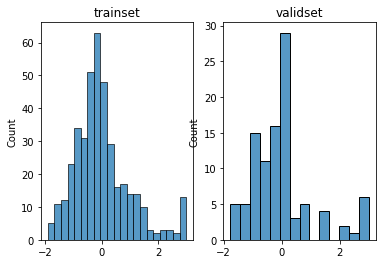

In [ ]:
plt.subplot(121);sns.histplot(x=y_train);plt.title('trainset')
plt.subplot(122);sns.histplot(x=y_valid);plt.title('validset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-01.PNG?raw=true width=600>
</p>

#### **모델 생성**

In [ ]:
from tensorflow.keras import layers, models, utils

def build_model() :
  x = layers.Input(shape=(13)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(15, activation = 'relu')(x)
  z = layers.Dense(6, activation = 'relu')(z)
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정
  # 회귀문제는 대부분 마지막 아웃풋 shape가 1, 마지막 활성화함수는 사용하지 않음
  model = models.Model(x,y, name='house_regression')
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "house_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 15)                210       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


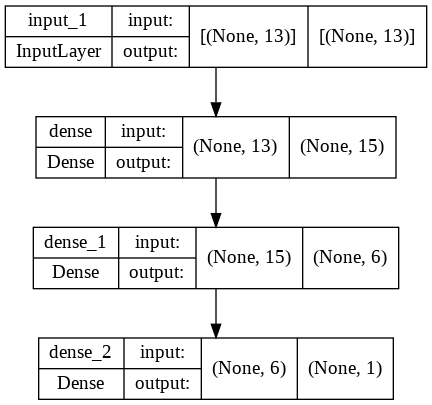

In [ ]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer) 
```
* `loss` : 회귀문제, mse or mae
* `optimizer` : 경사하강법(gradient discent) 기반의 성능이 향상된 함수 사용 - adam

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [ ]:
model.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 2ms/step - loss: 0.0967


0.09665990620851517

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [ ]:
y_pred = model.predict(X_valid)
y_pred = y_pred.flatten()
y_valid.shape, y_pred.shape

((102,), (102,))

* 예측 시각화

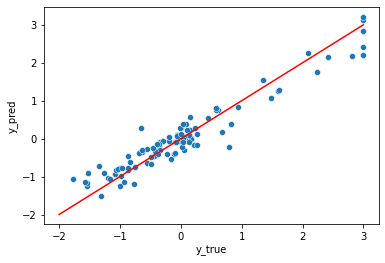

In [ ]:
sns.scatterplot(x=y_valid, y = y_pred)
plt.plot([-2,3], [-2,3], c = 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

## 과제
---

### | 과제1. 회귀 문제 정리

* 예측값의 범위 : 연속, 무한 but 정규화
* 예측값의 shape : (샘플 개수,1) 혹은 (샘플개수,)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : 없다.
* 손실함수 (loss) : mse,mae
* 평가함수 (metrics) : adam

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

(354, 13) (152, 13) (354,) (152,)
--------------------------------------------------
Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8856
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7163
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5701
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4626
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3278
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2206
Epoch 12/100
23/23 [=============

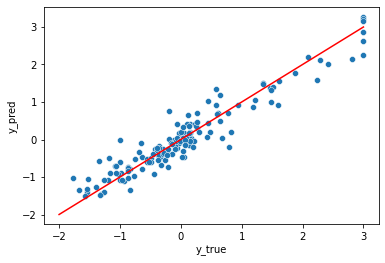

In [ ]:
from tensorflow.keras import layers, models, utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def load_data(path) :
  # 데이터 적절히 불러오기
  df = pd.read_csv(path,
                 header=None, # 첫번째 행이 컬럼으로 안나오게(컬럼 X)
                delim_whitespace = True ) # 스페이스바 기준으로 데이터가 나뉨
  # 정규화 (x의 모든 속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df) # 원래는 train셋을 정규화 하고 valid 셋에 적용을 해야함.
  # x-y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)
  # train-test 데이터 분할
  X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=0.3, random_state=1)
  print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)
  return X_train,X_valid, y_train, y_valid

  
def build_model(depth, width) : # depth : 모델 깊이(레이어 수 설정)   width : 레이어에서 설정할 weight의 너비
  x = layers.Input(shape=(13)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(width, activation = 'relu')(x) 
  for i in range(depth) :  
    z = layers.Dense(width, activation = 'relu')(z) 
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정
  # 회귀문제는 대부분 마지막 아웃풋 shape가 1, 마지막 활성화함수는 사용하지 않음
  model = models.Model(x,y, name='house_regression')
  return model

path = '/content/SkillTreePython-DeepLearning/dataset/housing.csv'
X_train,X_valid, y_train, y_valid = load_data(path)
model = build_model(depth = 4, width = 16)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
print('-'*50)
model.fit(X_train, y_train, epochs = 100, batch_size = 16)
print('-'*50)
model.evaluate(X_valid, y_valid)
print('-'*50)
y_pred = model.predict(X_valid)
y_pred = y_pred.flatten()
sns.scatterplot(x=y_valid, y = y_pred)
plt.plot([-2,3], [-2,3], c = 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

### | 과제 3. 캘리포니아 집값 예측

---

> 1990년 캘리포니아 인구조사 데이터인 캘리포니아 주택 가격(California Housing Prices) 데이터를 사용하며 학습을 통해 주택 가격을 예측하는 문제입니다.


```
- 0 longitude: 경도
- 1 latitude: 위도
- 2 housing_median_age: 주택나이 (중앙값)
- 3 total_rooms: 전체 방 수
- 4 total_bedrooms: 전체 침실 수
- 5 population: 인구
- 6 households: 세대
- 7 median_income: 소득(중앙값)
- 8 median_house_value: 주택 가치(중앙값)
```

* `/content/sample_data/california_housing_train.csv` 

In [ ]:
path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def load_data(path) :
  # 데이터 적절히 불러오기
  df = pd.read_csv(path)
  # 정규화 (x의 모든 속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df) # 원래는 train셋을 정규화 하고 valid 셋에 적용을 해야함.
  # x-y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)
  # train-test 데이터 분할
  X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2, random_state=1)
  print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)
  return X_train,X_valid, y_train, y_valid
X_train,X_valid, y_train, y_valid = load_data(path)

(13600, 8) (3400, 8) (13600,) (3400,)


In [ ]:
def build_model(depth, width) : # depth : 모델 깊이(레이어 수 설정)   width : 레이어에서 설정할 weight의 너비
  x = layers.Input(shape=(8)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(width, activation = 'relu')(x)
  for i in range(depth) :  
    z = layers.Dense(width, activation = 'relu')(z) 
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정
  # 회귀문제는 대부분 마지막 아웃풋 shape가 1, 마지막 활성화함수는 사용하지 않음
  model = models.Model(x,y, name='house_regression')
  return model

--------------------------------------------------
Epoch 1/20
425/425 [==============================] - 2s 3ms/step - loss: 0.4958
Epoch 2/20
425/425 [==============================] - 1s 2ms/step - loss: 0.3194
Epoch 3/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2870
Epoch 4/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2720
Epoch 5/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2678
Epoch 6/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2595
Epoch 7/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2530
Epoch 8/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2514
Epoch 9/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2499
Epoch 10/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2458
Epoch 11/20
425/425 [==============================] - 1s 2ms/step - loss: 0.2405
Epoch 12/20
425/425 [==============================] - 1

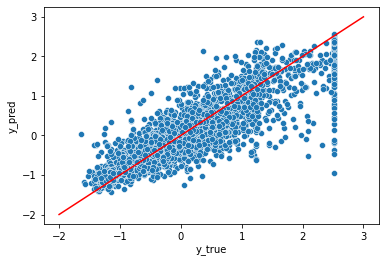

In [ ]:
model = build_model(depth = 10, width = 16) # 총 layer 13, weight 16
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
print('-'*50)
model.fit(X_train, y_train, epochs = 20, batch_size = 32)
print('-'*50)
model.evaluate(X_valid, y_valid)
print('-'*50)
y_pred = model.predict(X_valid)
y_pred = y_pred.flatten()
sns.scatterplot(x=y_valid, y = y_pred)
plt.plot([-2,3], [-2,3], c = 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()